In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
listings_data_path = Path.cwd().parent / "data" / "processed" / "listings_regular_license.parquet"
calendar_data_path = Path.cwd().parent / "data" / "processed" / "calendar_cleaned.parquet"
df = pd.read_parquet(listings_data_path, engine="pyarrow")

In [45]:
bins = [0, 500, 2000, 4000, 6000, 10000, 35000, np.inf]

labels = ['Very Low (<500)', 'Low (500-2k)', 'Moderate (2k-4k)', 
          'Above Moderate (4k-6k)', 'High (6k-10k)', 
          'Very High (10k-35k)', 'Super High (35k+)']

df["revenue_cat"] = pd.cut(
    df["estimated_revenue_l365d"],
    bins=bins,
    labels=labels,
    right=True
).astype(str).fillna("Unknown")

In [17]:
# Don't use arbitrary cutoffs - find natural breaks
availability_bins = [0, 90, 180, 270, 365]
labels = ['Seasonal (<90)', 'Limited (90-180)', 
          'Moderate (180-270)', 'Year-Round (270+)']

df["availability_category"] = pd.cut(
    df["availability_365"],
    bins=availability_bins,
    right=True,
    labels=labels
).astype(str).fillna("Unknown")

In [36]:
df.sort_values(by="estimated_revenue_l365d", ascending=False).head(3)

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category,occupancy_cat,availability_category
2551,PROP_2D05,Ma - Enti - En #1488,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.86,4.97,4.59,4.41,LIC_49A551,True,1.63,Large Multi (4+),101-200,Limited (90-180)
2552,PROP_084F,Ma - Enti - En #1489,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.55,4.61,4.12,4.27,LIC_0B152F,True,1.86,Large Multi (4+),101-200,Limited (90-180)
2275,PROP_1387,Ho - Enti - En #0985,HOST_B14C,2015-03-18,"Thessaloniki, Greece",within an hour,100%,1.0,False,33,...,4.26,4.71,4.69,4.41,LIC_EAACCD,True,3.17,Large Multi (4+),200+,Year-Round (270+)


In [37]:
df.loc[df["host_id"] == "HOST_569B"]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category,occupancy_cat,availability_category
756,PROP_1FDC,Pe - Enti - En #0550,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.72,4.62,4.54,4.48,LIC_4881C7,True,1.56,Large Multi (4+),0-30,Limited (90-180)
810,PROP_9EEA,Pe - Enti - En #0594,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.83,4.79,4.54,4.49,LIC_553F4E,True,1.12,Large Multi (4+),61-100,Limited (90-180)
866,PROP_AE6D,Up - Enti - En #0640,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.77,4.72,4.55,4.46,LIC_ADECC1,True,2.45,Large Multi (4+),61-100,Limited (90-180)
870,PROP_023C,Pe - Enti - En #0643,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.81,4.79,4.63,4.58,LIC_F023F0,True,1.24,Large Multi (4+),0-30,Limited (90-180)
935,PROP_61DF,Ad - Enti - En #0680,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.71,4.70,4.56,4.47,LIC_153F41,True,2.54,Large Multi (4+),200+,Moderate (180-270)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,PROP_0927,Ny - Enti - En #2775,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,5.00,5.00,4.75,5.00,LIC_75FF4B,True,2.03,Large Multi (4+),0-30,Limited (90-180)
4340,PROP_90BA,St - Enti - En #2843,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,5.00,5.00,5.00,5.00,LIC_2E6357,True,1.00,Large Multi (4+),0-30,Limited (90-180)
4345,PROP_DF95,Ae - Enti - En #2848,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,5.00,5.00,5.00,4.00,LIC_679643,True,1.00,Large Multi (4+),0-30,Year-Round (270+)
4346,PROP_F196,Ho - Enti - En #2849,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,NaN,NaN,NaN,NaN,LIC_A1FA19,True,NaN,Large Multi (4+),nan,Moderate (180-270)


<hr>

- landmark: midpoint between white tower and aristotelous square
- new variable: distance_cat {downtown (<1km):1400 listings, inner city(1-3km):2400 listings, neighbourhoods(3-6km):500 listings, suburban (>6km):500 listings}

1) Summary statics for new categories:
- mean distances from landamark respectively: 0.68, 1.45, 4, 6.7
- the most distant listing is approx 8km from landmark
- median prices respectively: 66, 50, 60 ,73 (effect size: eta squared 0.027)
- median estimated revenue 365: 5030, 3534, 1944, 2112 (effect size: 0.015) here outliers create big discrepancies from means (especially for inner city , there are two outliers with 100k)
- average reviews ratings: 4.76, 4.69, 7.81, 4.76 (effect size: 0.012)
- average location ratings: 4.88, 4.62, 4.72, 4.74 (effect size: 0.110)
- mean-median estimated occupancy 365: 36-74, 36-65, 30-58, 24-46 (effect size: 0.006)
- superhost percentage: 48, 32, 37, 32 (effect size: crammer's v 0.142)
- host category percentages: (individual 19, small multi 15, multi 60), (individual 22, small multi 17, multi 56), (individual 40, small multi 27, multi 27), (individual 39, small multi 22, multi 44)
- mean of accomodates: 3.7, 3.5, 3.8, 4.2 (effect size: eta squared 0.010)

2) My highlights from the above: 
- downtown and suburban listings hit higher on pricing, the first due to location and the second due to higher quality listings.
- downtown is a strong predictor for higher revenue
- multi hosts are more active towards city center willing to take advantage of the market dynamics (stronger revenues, target tourists)
- superhosts are prominent downtown, but they also have a good proportion on neighbourhoods category where the smal multi category is also prominent
- inner city listings seem to underperform some categories, which might be a sign of lower quality but more affordable choices
- Analyzing a map shows that proximity to sea leads to more pricey listings

<hr>

Revenue Category Very Low (<500): 273 listings
count    273.000000
mean     349.054945
std       84.420346
min      174.000000
25%      294.000000
50%      348.000000
75%      426.000000
max      498.000000
Name: estimated_revenue_l365d, dtype: float64
DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           349.05
  Median:         348.00
  Mode:           306.0

Dispersion:
  Std Dev:        84.42
  Variance:       7126.79
  Range:          324.00
  IQR:            132.00

Quartiles:
  Min (0%):       174.00
  Q1 (25%):       294.00
  Q2 (50%):       348.00
  Q3 (75%):       426.00
  Max (100%):     498.00

Shape:
  Skewness:       -0.071
  Kurtosis:       -0.963

Sample Size:
  Valid:          273
  Missing:        0
  Total:          273


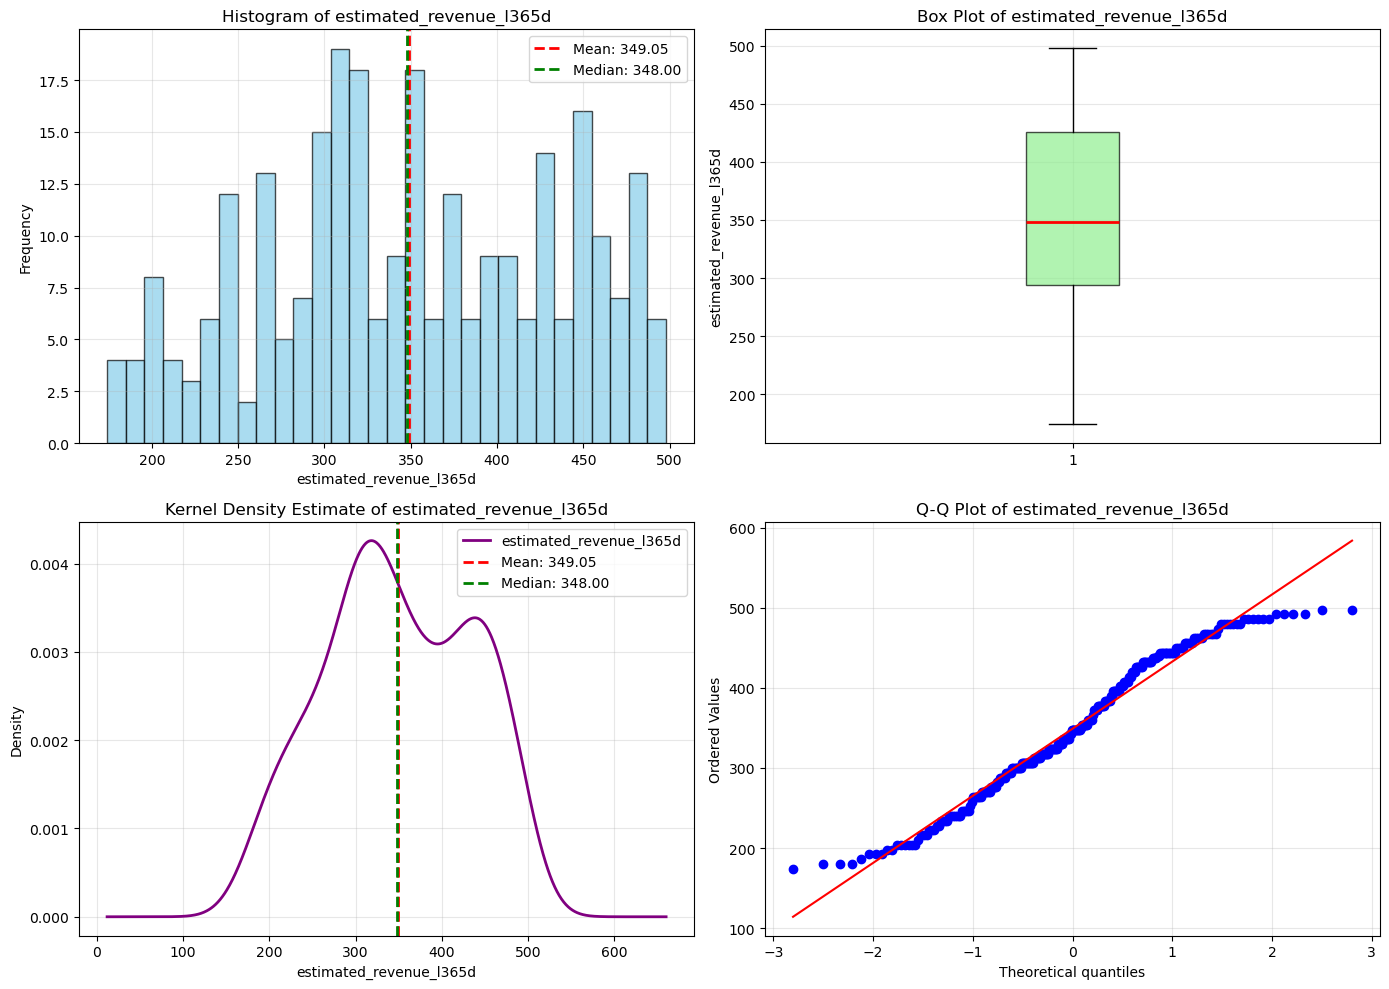

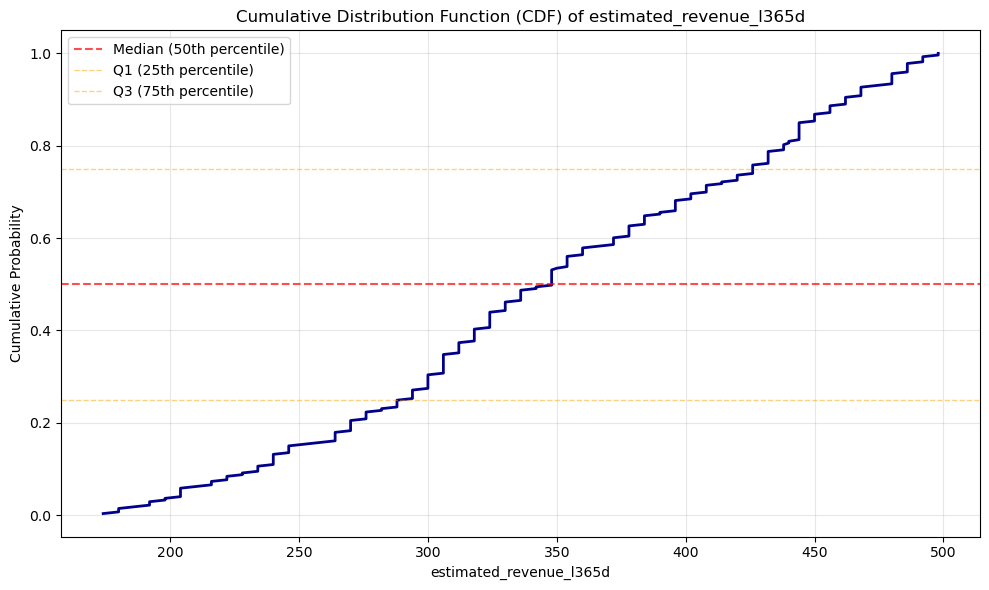

Revenue Category Low (500-2k): 1026 listings
count    1026.000000
mean     1179.434698
std       435.943492
min       504.000000
25%       792.000000
50%      1146.000000
75%      1548.000000
max      1998.000000
Name: estimated_revenue_l365d, dtype: float64
DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           1179.43
  Median:         1146.00
  Mode:           1056.0

Dispersion:
  Std Dev:        435.94
  Variance:       190046.73
  Range:          1494.00
  IQR:            756.00

Quartiles:
  Min (0%):       504.00
  Q1 (25%):       792.00
  Q2 (50%):       1146.00
  Q3 (75%):       1548.00
  Max (100%):     1998.00

Shape:
  Skewness:       0.163
  Kurtosis:       -1.184

Sample Size:
  Valid:          1026
  Missing:        0
  Total:          1026


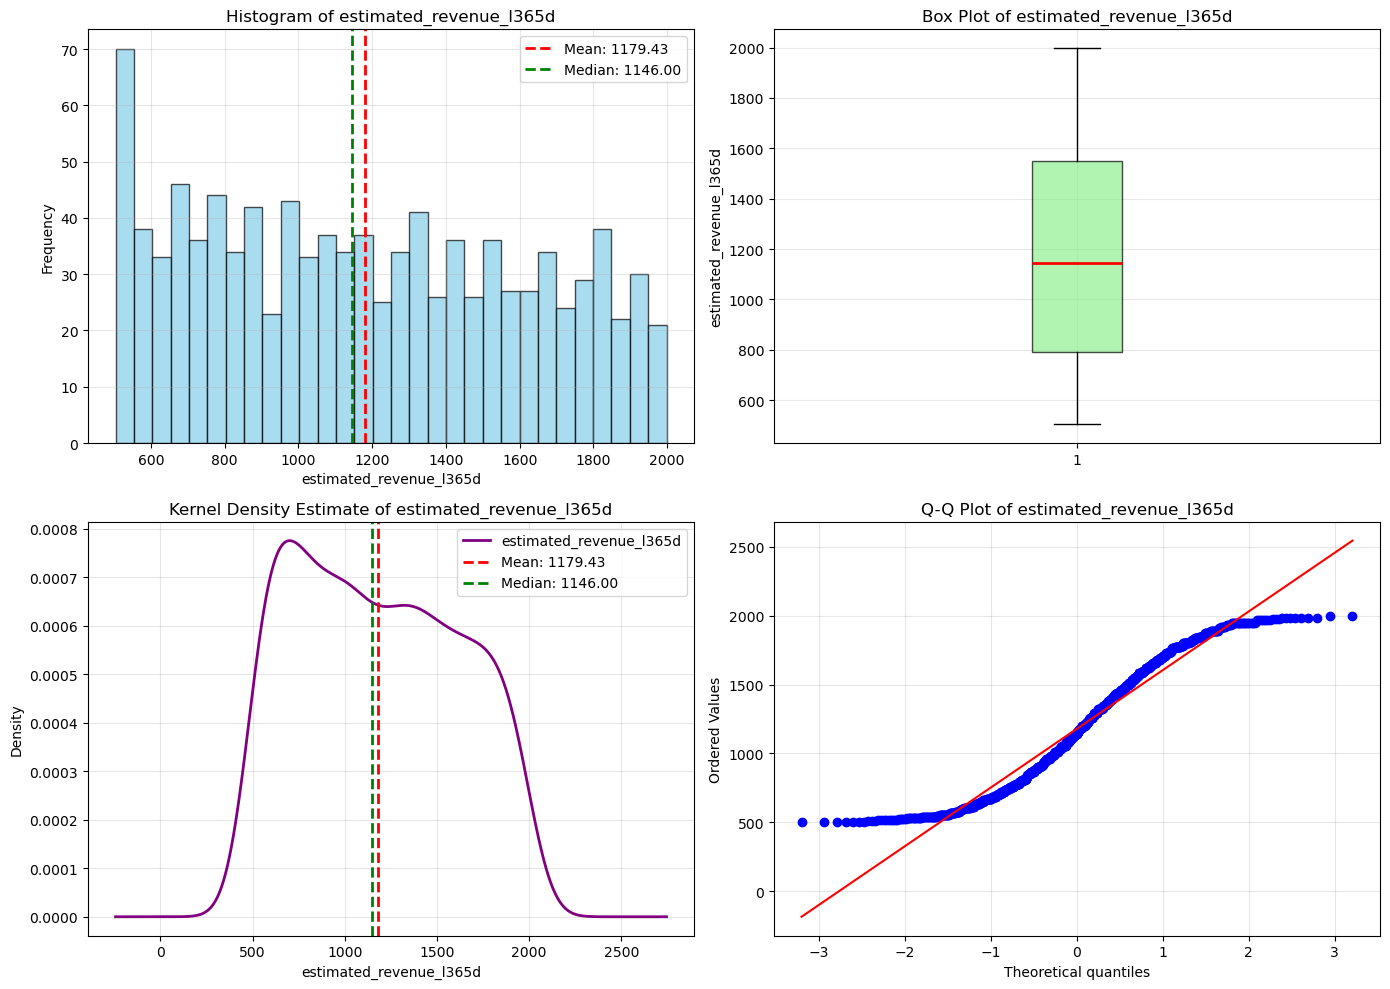

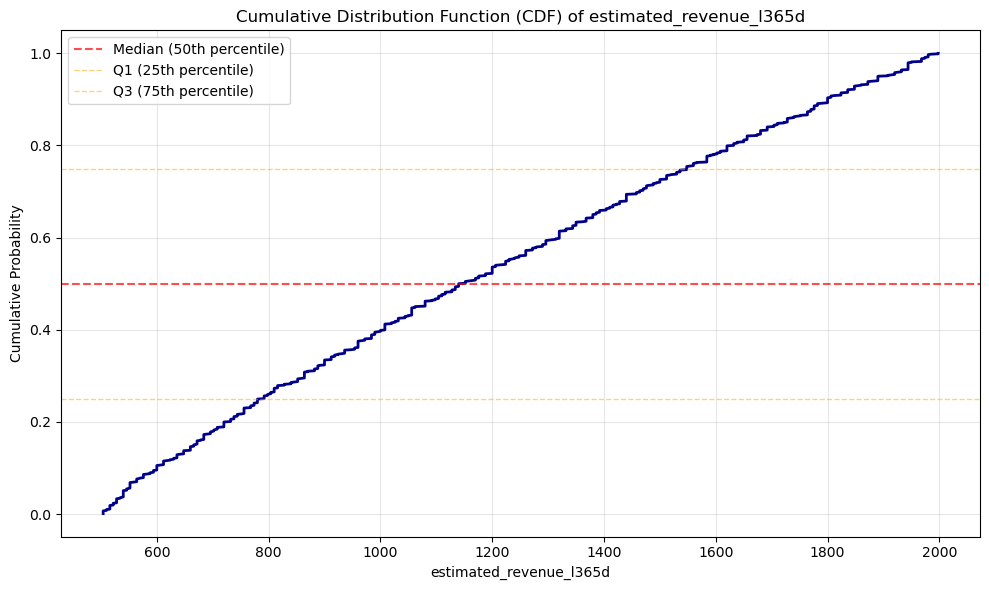

Revenue Category Moderate (2k-4k): 673 listings
count     673.000000
mean     2905.881129
std       582.341434
min      2010.000000
25%      2376.000000
50%      2844.000000
75%      3420.000000
max      4000.000000
Name: estimated_revenue_l365d, dtype: float64
DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           2905.88
  Median:         2844.00
  Mode:           2640.0

Dispersion:
  Std Dev:        582.34
  Variance:       339121.55
  Range:          1990.00
  IQR:            1044.00

Quartiles:
  Min (0%):       2010.00
  Q1 (25%):       2376.00
  Q2 (50%):       2844.00
  Q3 (75%):       3420.00
  Max (100%):     4000.00

Shape:
  Skewness:       0.213
  Kurtosis:       -1.185

Sample Size:
  Valid:          673
  Missing:        0
  Total:          673


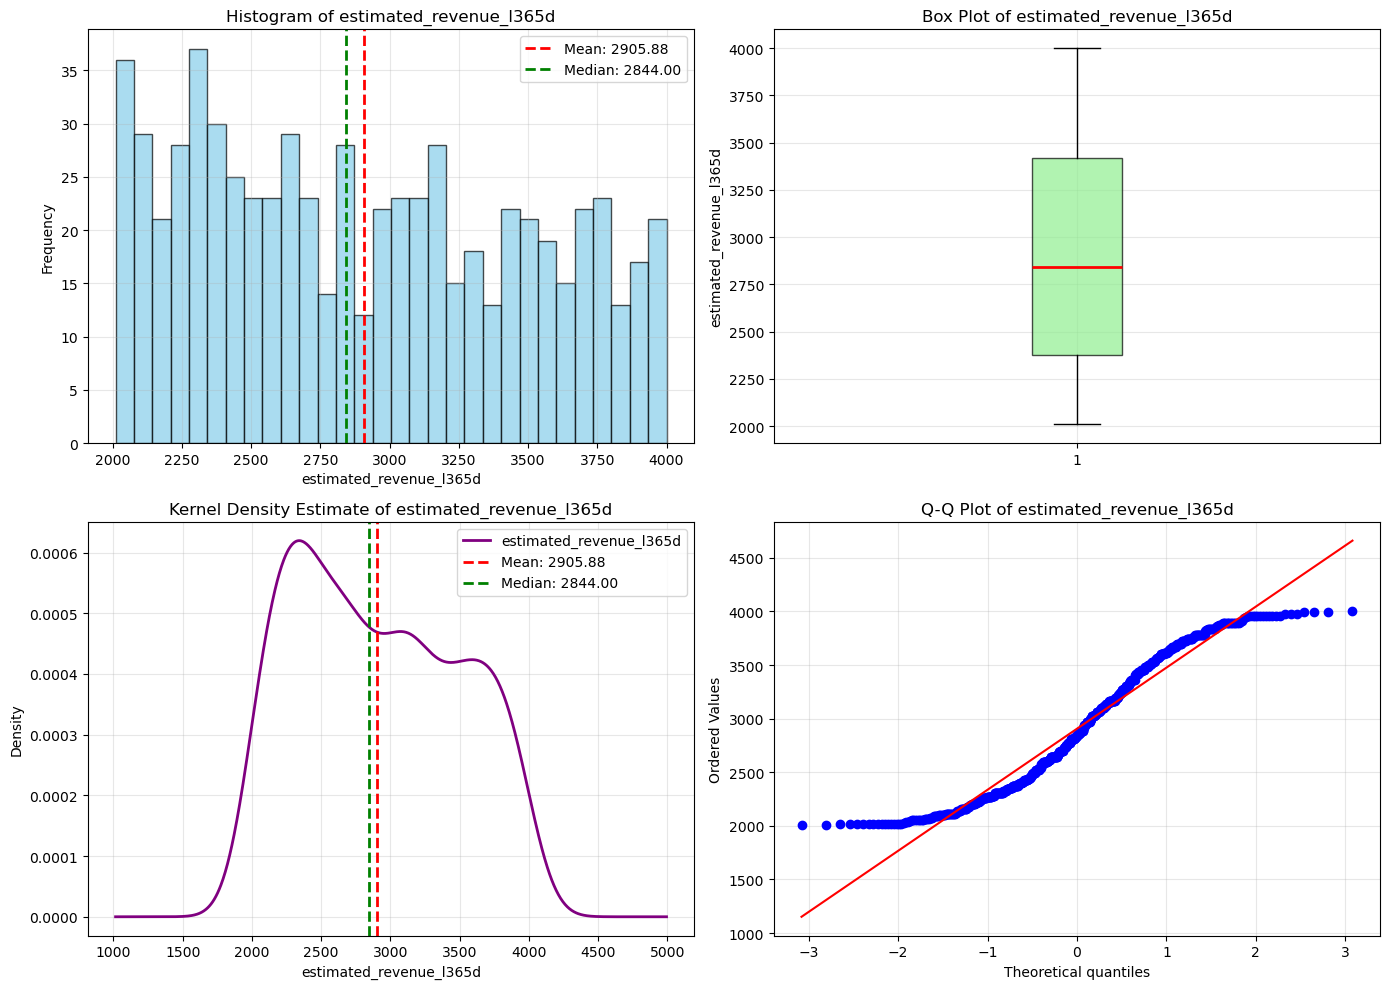

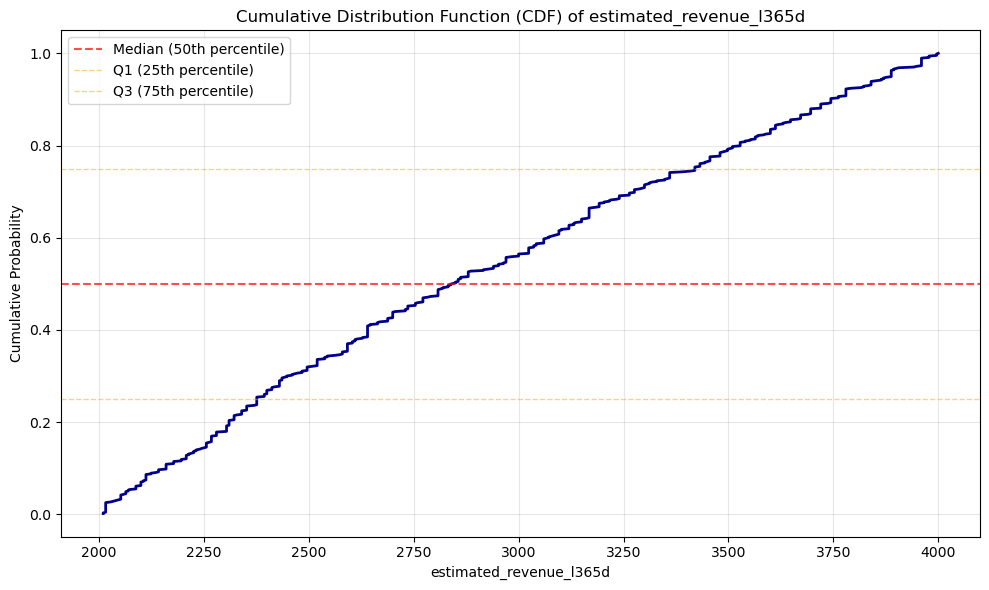

Revenue Category Above Moderate (4k-6k): 418 listings
count     418.000000
mean     4972.009569
std       568.004509
min      4020.000000
25%      4483.500000
50%      4932.000000
75%      5472.000000
max      6000.000000
Name: estimated_revenue_l365d, dtype: float64
DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           4972.01
  Median:         4932.00
  Mode:           4320.0

Dispersion:
  Std Dev:        568.00
  Variance:       322629.12
  Range:          1980.00
  IQR:            988.50

Quartiles:
  Min (0%):       4020.00
  Q1 (25%):       4483.50
  Q2 (50%):       4932.00
  Q3 (75%):       5472.00
  Max (100%):     6000.00

Shape:
  Skewness:       0.117
  Kurtosis:       -1.125

Sample Size:
  Valid:          418
  Missing:        0
  Total:          418


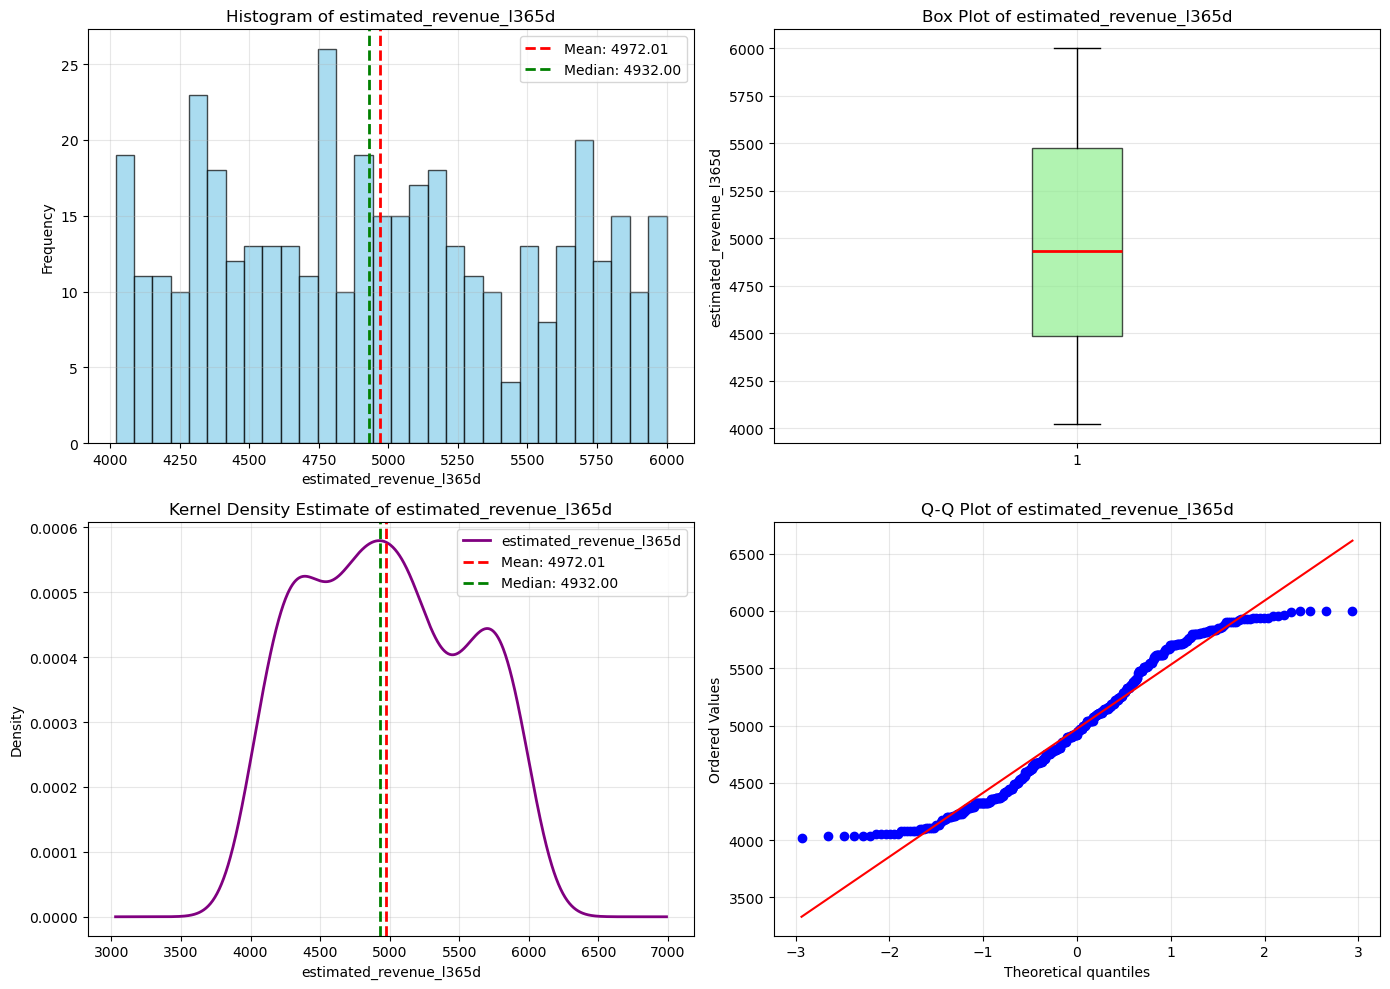

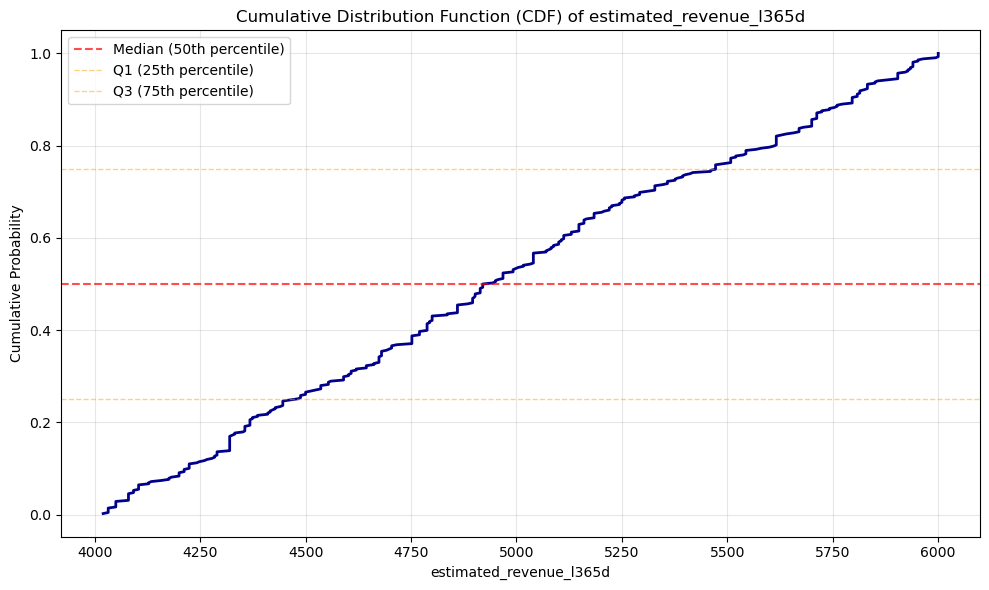

Revenue Category High (6k-10k): 541 listings
count     541.000000
mean     7818.767098
std      1165.691347
min      6006.000000
25%      6804.000000
50%      7722.000000
75%      8832.000000
max      9996.000000
Name: estimated_revenue_l365d, dtype: float64
DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           7818.77
  Median:         7722.00
  Mode:           6480.0

Dispersion:
  Std Dev:        1165.69
  Variance:       1358836.32
  Range:          3990.00
  IQR:            2028.00

Quartiles:
  Min (0%):       6006.00
  Q1 (25%):       6804.00
  Q2 (50%):       7722.00
  Q3 (75%):       8832.00
  Max (100%):     9996.00

Shape:
  Skewness:       0.255
  Kurtosis:       -1.121

Sample Size:
  Valid:          541
  Missing:        0
  Total:          541


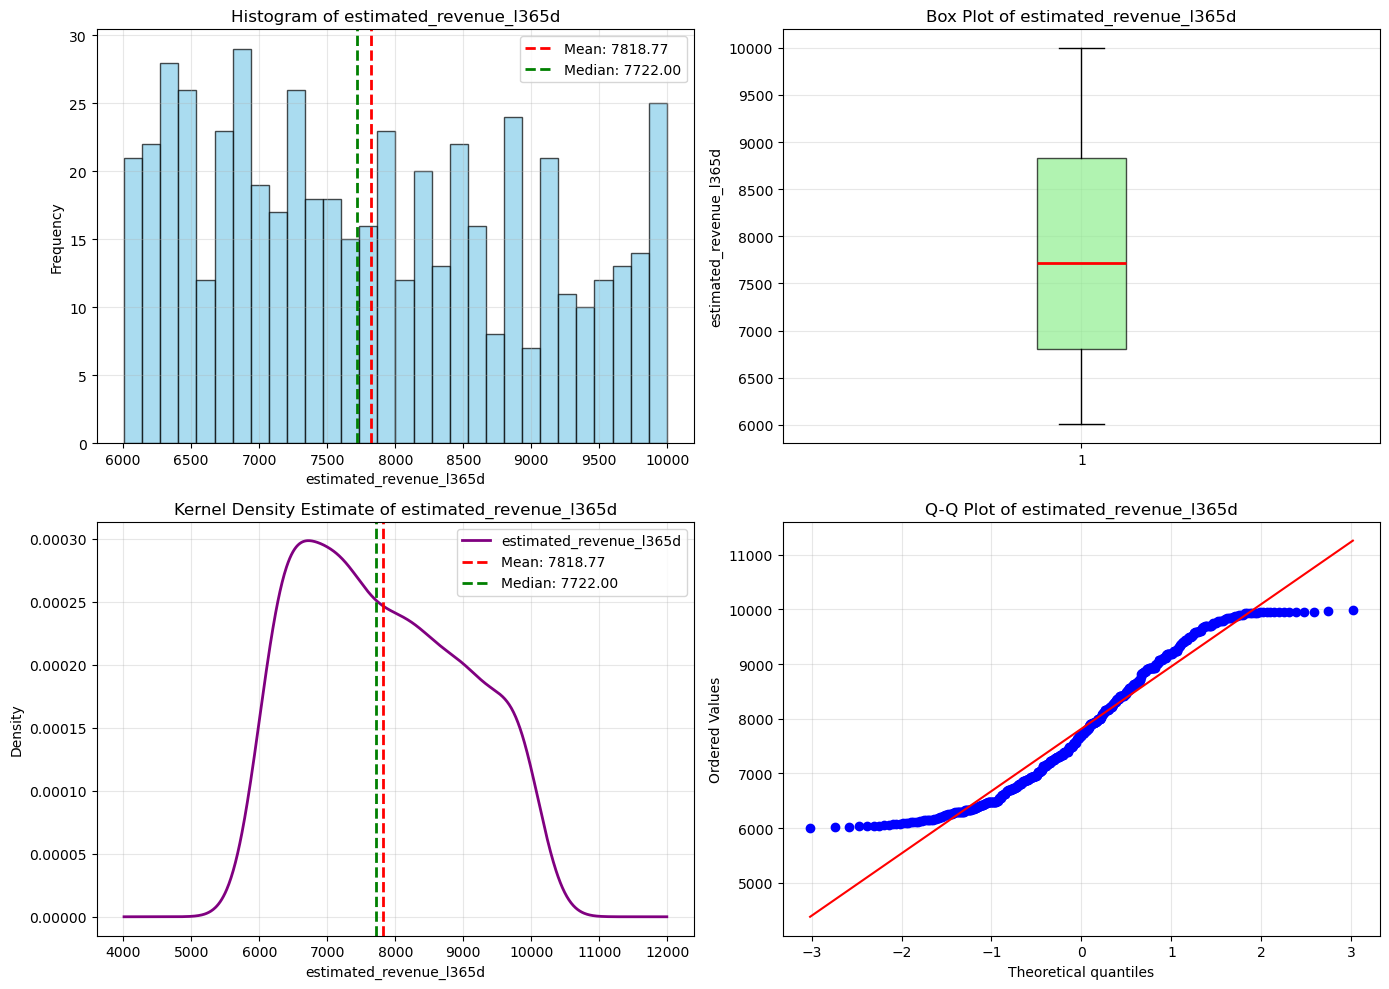

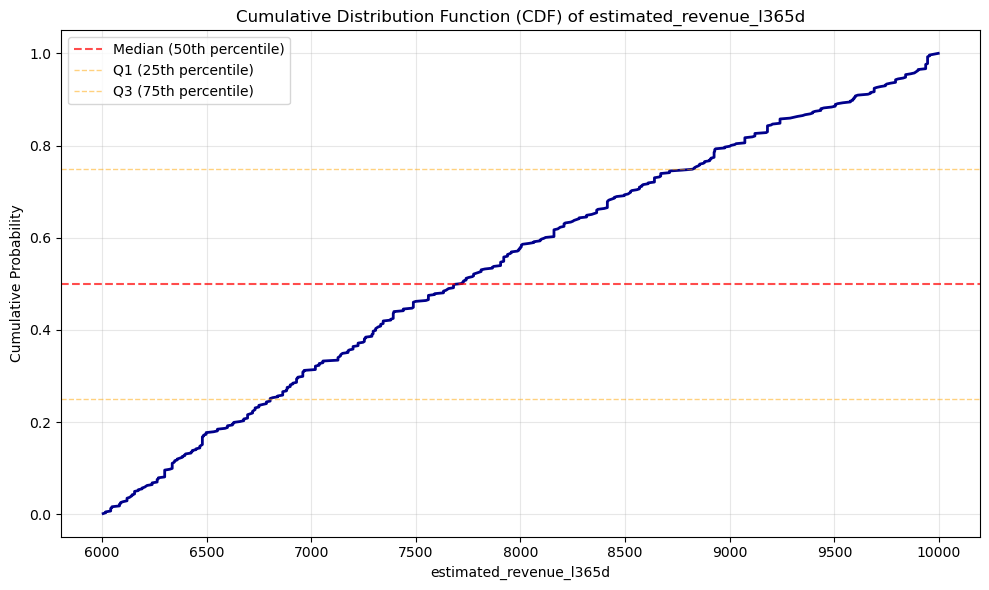

Revenue Category Very High (10k-35k): 434 listings
count      434.000000
mean     14696.294931
std       4891.162727
min      10032.000000
25%      11220.000000
50%      13005.000000
75%      16432.500000
max      34398.000000
Name: estimated_revenue_l365d, dtype: float64
DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           14696.29
  Median:         13005.00
  Mode:           10455.0

Dispersion:
  Std Dev:        4891.16
  Variance:       23923472.82
  Range:          24366.00
  IQR:            5212.50

Quartiles:
  Min (0%):       10032.00
  Q1 (25%):       11220.00
  Q2 (50%):       13005.00
  Q3 (75%):       16432.50
  Max (100%):     34398.00

Shape:
  Skewness:       1.568
  Kurtosis:       2.065

Sample Size:
  Valid:          434
  Missing:        0
  Total:          434


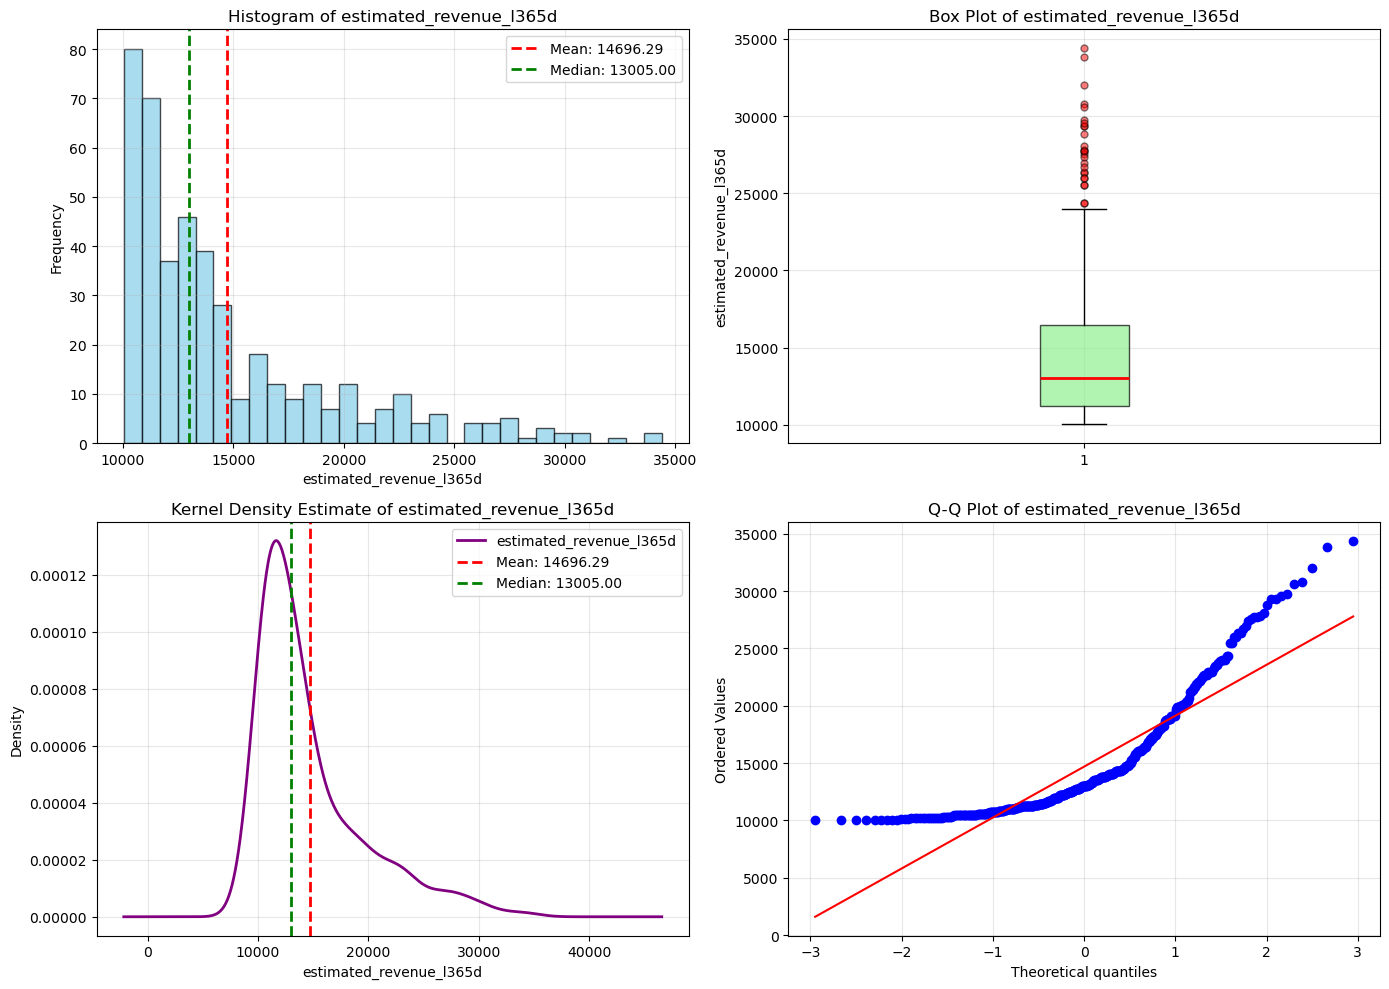

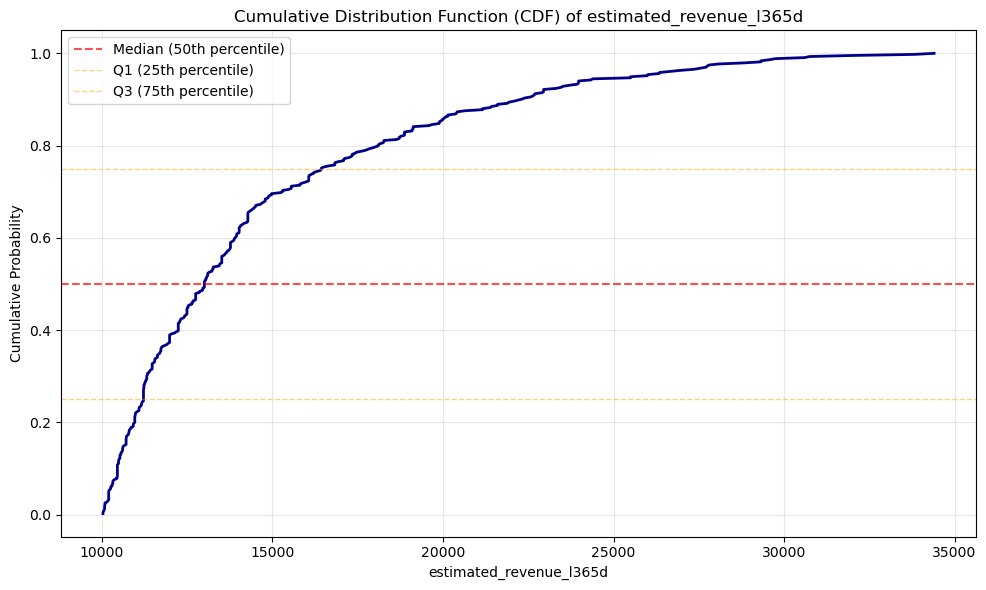

Revenue Category Super High (35k+): 13 listings
count        13.000000
mean      56841.923077
std       23430.546453
min       39780.000000
25%       41496.000000
50%       46320.000000
75%       59280.000000
max      109896.000000
Name: estimated_revenue_l365d, dtype: float64
DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           56841.92
  Median:         46320.00
  Mode:           39780.0

Dispersion:
  Std Dev:        23430.55
  Variance:       548990507.08
  Range:          70116.00
  IQR:            17784.00

Quartiles:
  Min (0%):       39780.00
  Q1 (25%):       41496.00
  Q2 (50%):       46320.00
  Q3 (75%):       59280.00
  Max (100%):     109896.00

Shape:
  Skewness:       1.784
  Kurtosis:       2.136

Sample Size:
  Valid:          13
  Missing:        0
  Total:          13


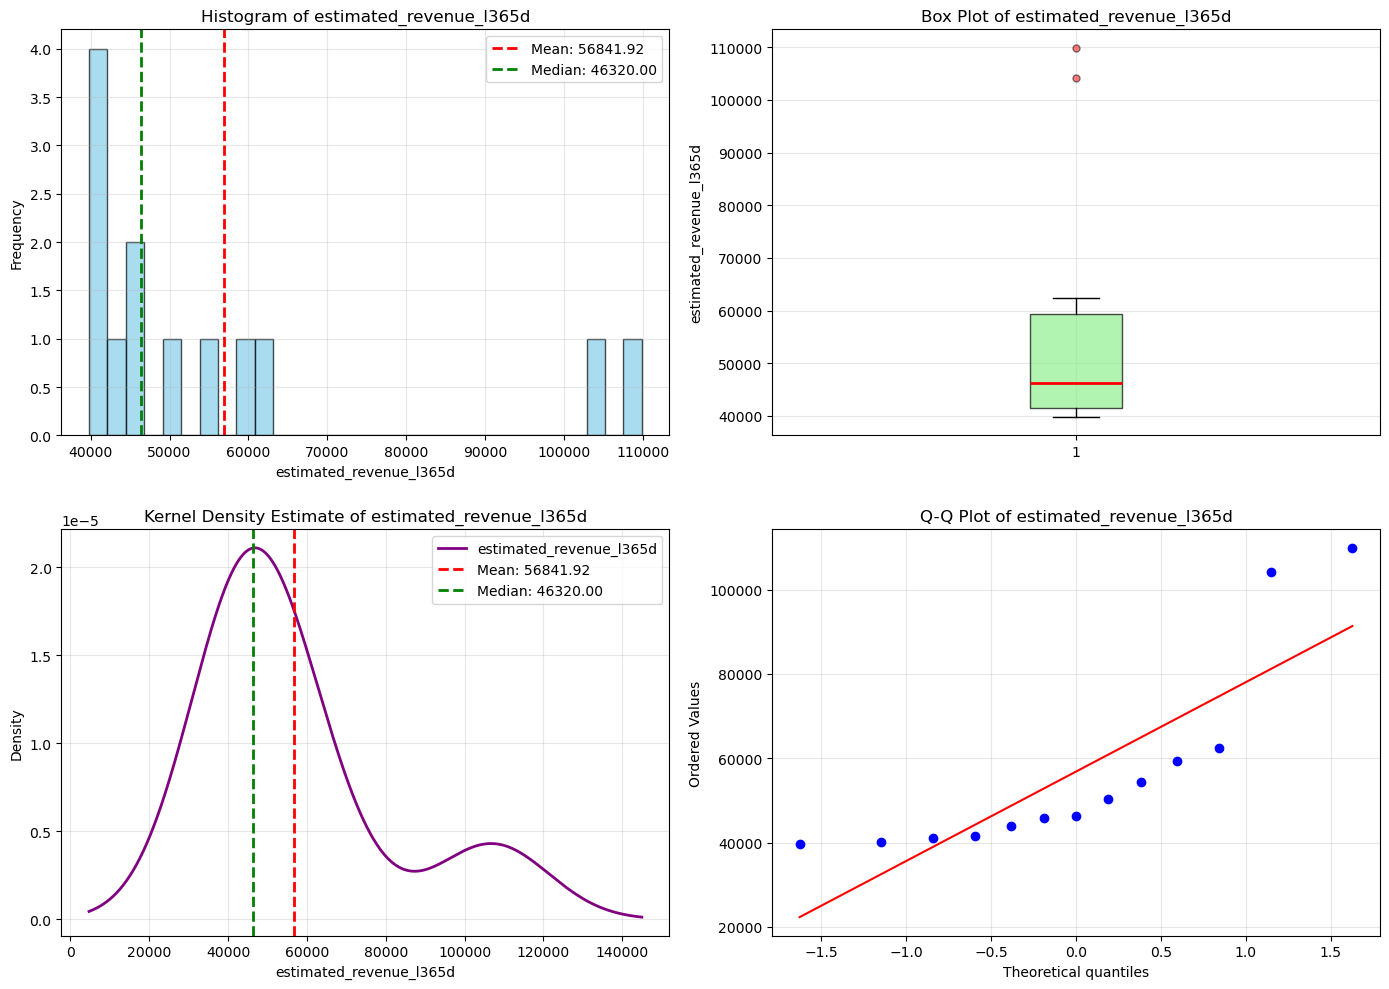

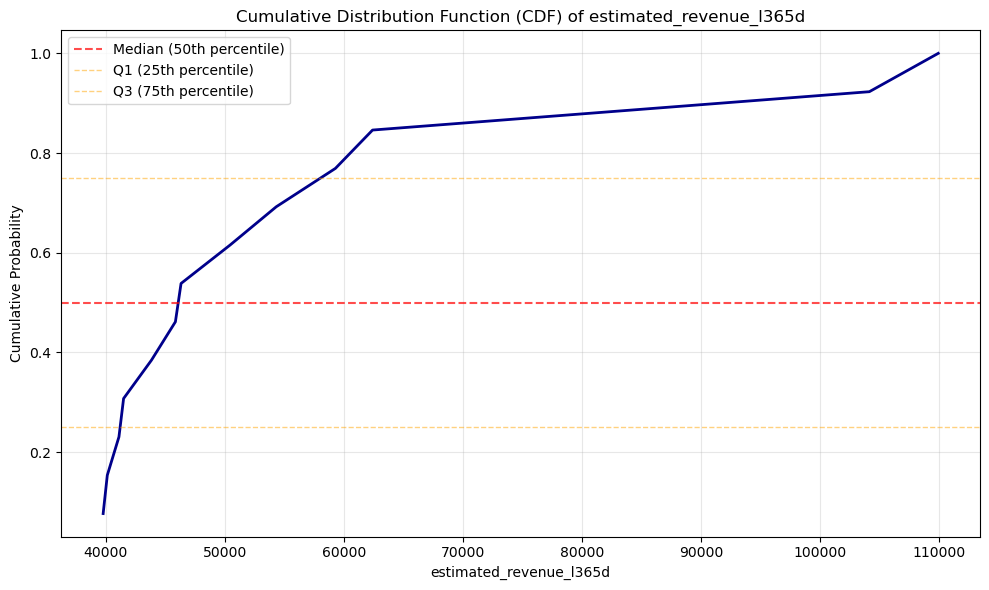

In [46]:
for cat in labels:
    group = df["estimated_revenue_l365d"].loc[df["revenue_cat"] == cat]
    count = group.shape[0]
    print(f"Revenue Category {cat}: {count} listings")

    print(group.describe(include='all'))

    analyze_numeric_variable(group)

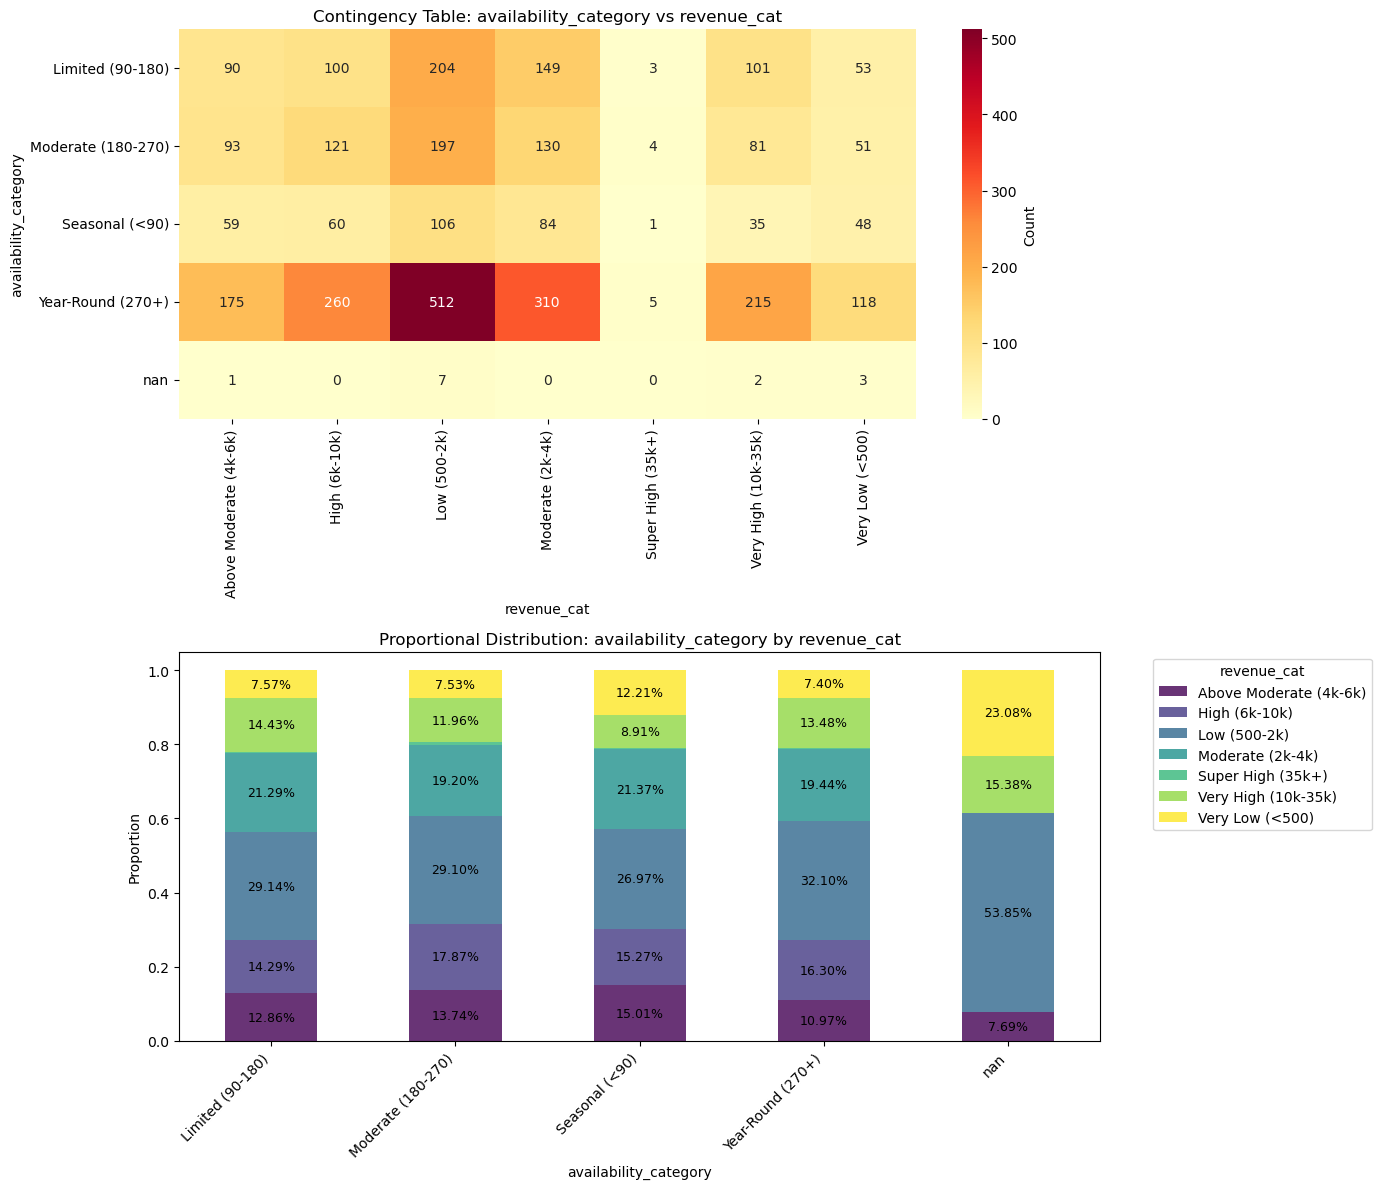

CHI-SQUARE TEST OF INDEPENDENCE: availability_category vs revenue_cat

Contingency Table:
revenue_cat            Above Moderate (4k-6k)  High (6k-10k)  Low (500-2k)  \
availability_category                                                        
Limited (90-180)                           90            100           204   
Moderate (180-270)                         93            121           197   
Seasonal (<90)                             59             60           106   
Year-Round (270+)                         175            260           512   
nan                                         1              0             7   

revenue_cat            Moderate (2k-4k)  Super High (35k+)  \
availability_category                                        
Limited (90-180)                    149                  3   
Moderate (180-270)                  130                  4   
Seasonal (<90)                       84                  1   
Year-Round (270+)                   310              

{'chi2_statistic': np.float64(42.96990927049379),
 'p_value': np.float64(0.010026066490122009),
 'degrees_of_freedom': 24,
 'cramers_v': np.float64(0.05639263658063984),
 'effect_interpretation': 'Negligible association',
 'is_significant': np.True_,
 'contingency_table': revenue_cat            Above Moderate (4k-6k)  High (6k-10k)  Low (500-2k)  \
 availability_category                                                        
 Limited (90-180)                           90            100           204   
 Moderate (180-270)                         93            121           197   
 Seasonal (<90)                             59             60           106   
 Year-Round (270+)                         175            260           512   
 nan                                         1              0             7   
 
 revenue_cat            Moderate (2k-4k)  Super High (35k+)  \
 availability_category                                        
 Limited (90-180)                    149       

In [50]:
col1 = df["availability_category"].loc[df["revenue_cat"] != "nan"]
col2 = df["revenue_cat"].loc[df["revenue_cat"] != "nan"]
#col1.index = df.index
col2.index = col1.index
analyze_categorical_categorical(col1, col2)

In [20]:
df.head(2)

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category,occupancy_cat,availability_category
0,PROP_BD43,Se - Enti - En #0001,HOST_EA8B,2010-06-03,"Thessalonika, Greece",None,None,0.00,False,2,...,5.00,5.00,5.00,5.00,LIC_5A6C4F,False,0.02,Small Multi (2-3),nan,nan
1,PROP_B6D8,Co - Enti - En #0001,HOST_723A,2012-05-13,"Thessalonika, Greece",within an hour,100%,0.97,True,1,...,4.95,4.95,4.74,4.75,LIC_FB61FA,False,2.62,Individual (1),101-200,Year-Round (270+)


In [9]:
df.loc[df["occupancy_cat"] == "200+"]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category,occupancy_cat
9,PROP_897E,Wa - Enti - En #0008,HOST_5933,2013-12-16,None,within an hour,100%,1.00,True,33,...,4.83,4.91,4.90,4.93,4.72,LIC_4705F6,True,6.03,Large Multi (4+),200+
15,PROP_75EE,Wa - Enti - En #0014,HOST_5933,2013-12-16,None,within an hour,100%,1.00,True,33,...,4.81,4.92,4.94,4.92,4.70,LIC_FB1E46,True,5.63,Large Multi (4+),200+
18,PROP_B5E8,Th - Enti - En #0017,HOST_4FB2,2014-02-18,"Thessaloniki, Greece",within an hour,100%,1.00,None,3,...,4.76,4.95,4.96,4.77,4.76,LIC_064309,True,3.81,Small Multi (2-3),200+
19,PROP_3FFA,Ci - Enti - En #0018,HOST_5933,2013-12-16,None,within an hour,100%,1.00,True,33,...,4.83,4.91,4.93,4.56,4.75,LIC_92D732,True,5.46,Large Multi (4+),200+
25,PROP_DB83,Su - Enti - En #0001,HOST_CAE5,2014-04-13,"Thessaloniki, Greece",within an hour,100%,1.00,True,1,...,4.88,4.94,4.96,4.96,4.85,LIC_62C380,False,5.16,Individual (1),200+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,PROP_922A,Mi - Enti - En #1380,HOST_6811,2024-11-03,"Thessaloniki, Greece",within an hour,100%,1.00,False,1,...,5.00,4.94,4.98,4.67,4.92,LIC_0C3CEC,True,6.55,Individual (1),200+
3560,PROP_9130,Ca - Enti - En #2200,HOST_6445,2020-09-07,"Thessaloniki, Greece",within an hour,100%,0.94,False,10,...,4.76,4.89,4.84,4.47,4.73,LIC_517615,False,6.19,Large Multi (4+),200+
3616,PROP_2987,Pe - Enti - En #2239,HOST_501B,2016-07-10,"Thessaloniki, Greece",within an hour,100%,1.00,True,1,...,4.90,4.96,5.00,4.78,4.86,LIC_4699DF,True,7.89,Individual (1),200+
3728,PROP_C383,Th - Enti - En #2334,HOST_BDE4,2022-01-11,"Thessaloniki, Greece",within an hour,100%,0.98,True,2,...,5.00,4.97,5.00,4.85,4.97,LIC_83AF39,True,5.18,Small Multi (2-3),200+


In [11]:
df.loc[df["host_id"] == "HOST_5933"]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category,occupancy_cat
9,PROP_897E,Wa - Enti - En #0008,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.83,4.91,4.90,4.93,4.72,LIC_4705F6,True,6.03,Large Multi (4+),200+
15,PROP_75EE,Wa - Enti - En #0014,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.81,4.92,4.94,4.92,4.70,LIC_FB1E46,True,5.63,Large Multi (4+),200+
19,PROP_3FFA,Ci - Enti - En #0018,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.83,4.91,4.93,4.56,4.75,LIC_92D732,True,5.46,Large Multi (4+),200+
27,PROP_7ED2,Ci - Enti - En #0025,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.78,4.93,4.94,4.58,4.63,LIC_9430AA,True,3.54,Large Multi (4+),200+
29,PROP_180C,Wa - Enti - En #0026,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.75,4.91,4.89,4.94,4.70,LIC_CC2DEA,True,6.07,Large Multi (4+),200+
46,PROP_F9E9,Do - Enti - En #0035,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.85,4.95,4.95,4.79,4.79,LIC_019290,True,6.42,Large Multi (4+),200+
66,PROP_53CD,Ba - Enti - En #0041,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.80,4.94,4.93,4.96,4.71,LIC_D4A44F,True,7.51,Large Multi (4+),200+
124,PROP_9586,Wa - Enti - En #0078,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.85,4.94,4.92,4.94,4.75,LIC_53E59B,True,6.37,Large Multi (4+),200+
125,PROP_2F09,Wa - Enti - En #0079,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.88,4.97,4.95,4.97,4.79,LIC_C4CE9F,True,7.16,Large Multi (4+),200+
126,PROP_E32A,Wa - Enti - En #0080,HOST_5933,2013-12-16,None,within an hour,100%,1.0,True,33,...,4.91,4.95,4.94,4.95,4.82,LIC_33CE6C,True,5.92,Large Multi (4+),200+


/tmp/ipykernel_10033/922360585.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x=cat_name, y=num_name, ax=axes[1],


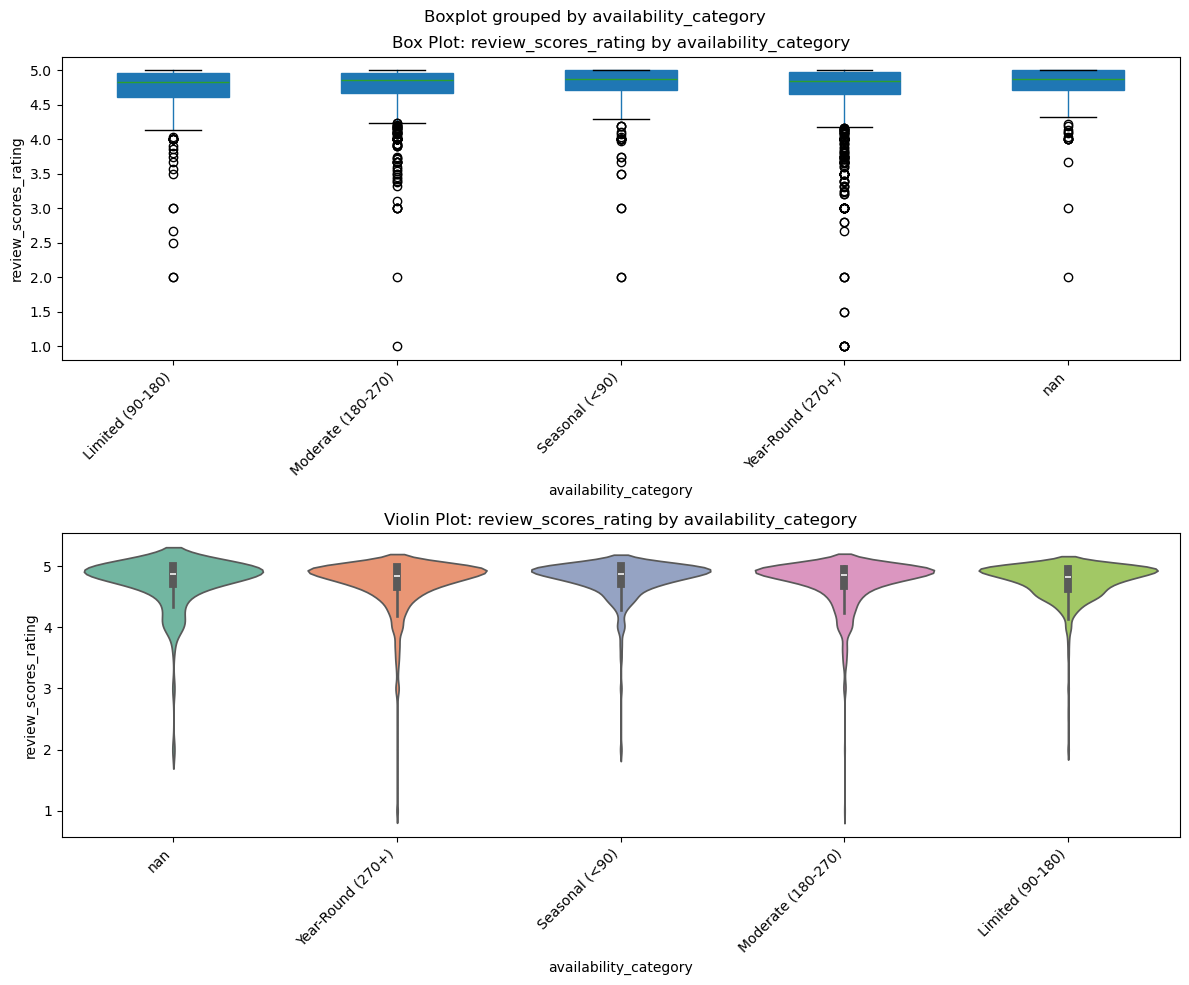

ONE-WAY ANOVA: review_scores_rating by availability_category

Descriptive Statistics by Group:

  availability_category = nan:
    N:      128
    Mean:   4.7468
    Median: 4.8800
    Std:    0.4110
    Min:    2.0000
    Max:    5.0000

  availability_category = Year-Round (270+):
    N:      1781
    Mean:   4.7089
    Median: 4.8400
    Std:    0.4447
    Min:    1.0000
    Max:    5.0000

  availability_category = Seasonal (<90):
    N:      484
    Mean:   4.7823
    Median: 4.8700
    Std:    0.3254
    Min:    2.0000
    Max:    5.0000

  availability_category = Moderate (180-270):
    N:      753
    Mean:   4.7239
    Median: 4.8600
    Std:    0.3860
    Min:    1.0000
    Max:    5.0000

  availability_category = Limited (90-180):
    N:      795
    Mean:   4.7468
    Median: 4.8300
    Std:    0.3130
    Min:    2.0000
    Max:    5.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      3.8538
  P-value:             0.003959
  Eta-squared (η²):

{'test_name': 'One-Way ANOVA',
 'test_statistic': np.float64(3.8537711722246533),
 'p_value': np.float64(0.003959022529188008),
 'effect_size': np.float64(0.003901155499615685),
 'effect_measure': 'Eta-squared (η²)',
 'effect_interpretation': 'Negligible effect',
 'is_significant': np.True_,
 'n_groups': 5,
 'groups': array([np.str_('nan'), 'Year-Round (270+)', 'Seasonal (<90)',
        'Moderate (180-270)', 'Limited (90-180)'], dtype=object),
 'interpretation': 'SIGNIFICANT difference detected (p=0.003959). availability_category has a significant effect on review_scores_rating. Negligible effect (Eta-squared (η²) = 0.004).',
 'categorical_variable': 'availability_category',
 'numerical_variable': 'review_scores_rating'}

In [55]:
analyze_categorical_numerical(df["availability_category"], df["review_scores_rating"])

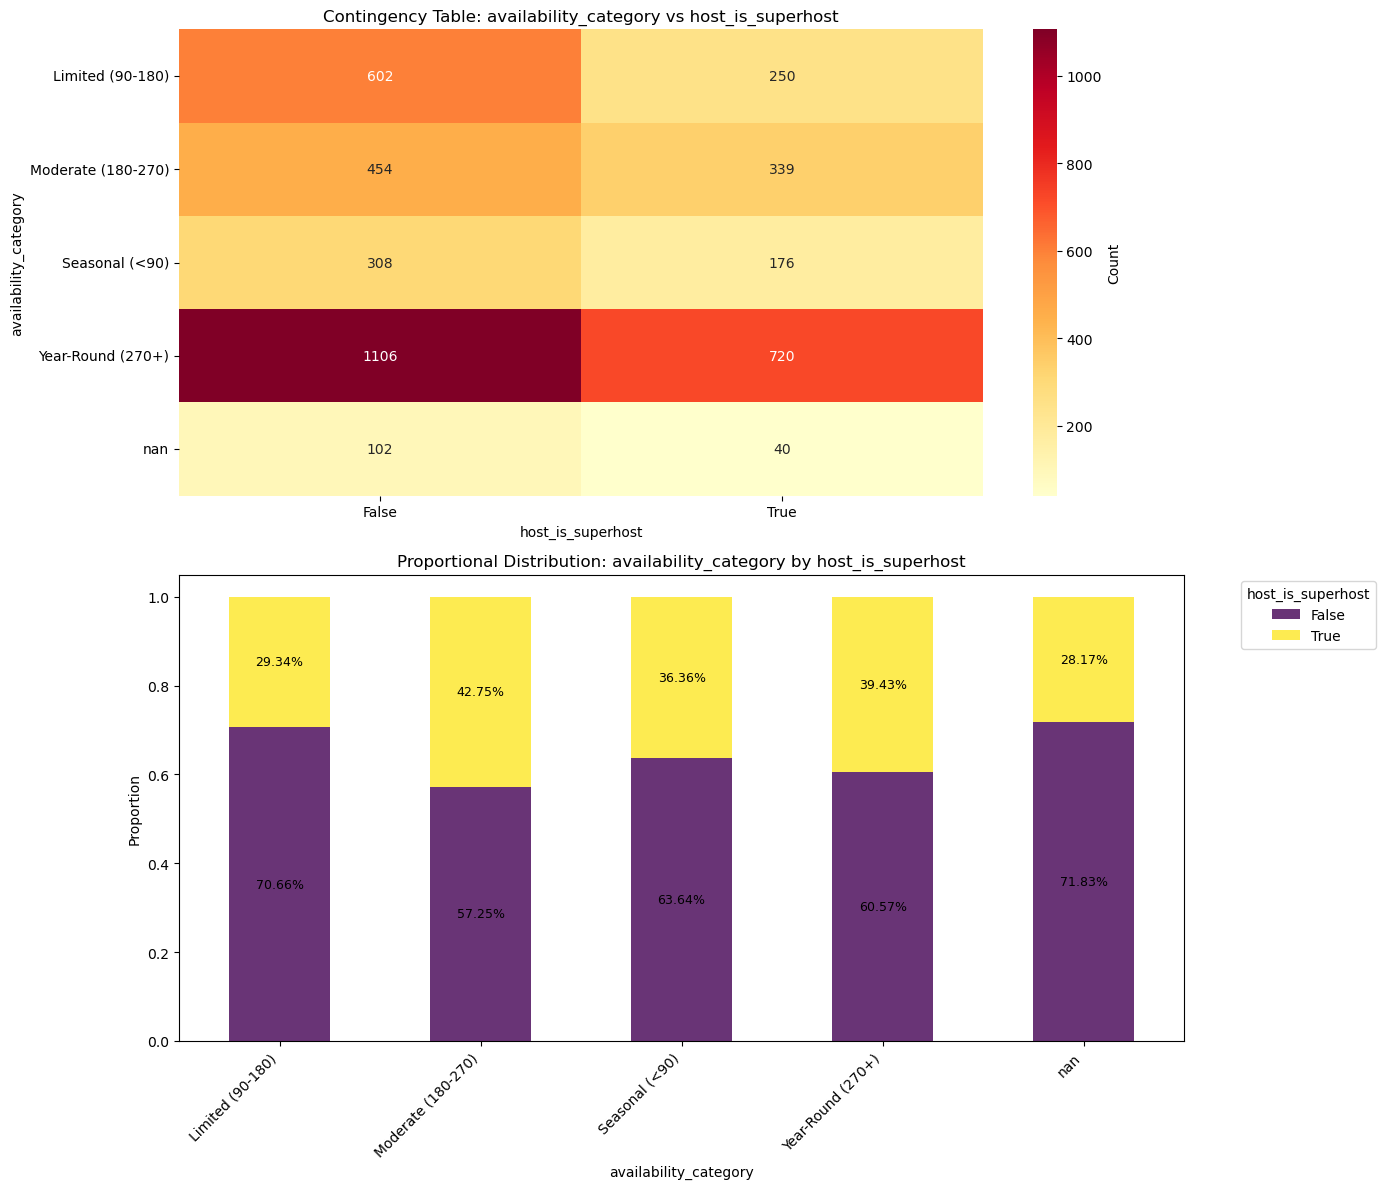

CHI-SQUARE TEST OF INDEPENDENCE: availability_category vs host_is_superhost

Contingency Table:
host_is_superhost      False  True 
availability_category              
Limited (90-180)         602    250
Moderate (180-270)       454    339
Seasonal (<90)           308    176
Year-Round (270+)       1106    720
nan                      102     40

Test Statistics:
  Chi-square statistic: 41.9474
  Degrees of freedom:   4
  P-value:              0.000000
  Cramér's V:           0.101
  Effect size:          Weak association
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT association detected (p=0.000000). availability_category and host_is_superhost are related. Weak association (Cramér's V = 0.101).


{'chi2_statistic': np.float64(41.9474036871232),
 'p_value': np.float64(1.7105676388534695e-08),
 'degrees_of_freedom': 4,
 'cramers_v': np.float64(0.1011857979336607),
 'effect_interpretation': 'Weak association',
 'is_significant': np.True_,
 'contingency_table': host_is_superhost      False  True 
 availability_category              
 Limited (90-180)         602    250
 Moderate (180-270)       454    339
 Seasonal (<90)           308    176
 Year-Round (270+)       1106    720
 nan                      102     40,
 'expected_frequencies': array([[ 534.86551135,  317.13448865],
        [ 497.82670247,  295.17329753],
        [ 303.84378814,  180.15621186],
        [1146.31974616,  679.68025384],
        [  89.14425189,   52.85574811]]),
 'interpretation': "SIGNIFICANT association detected (p=0.000000). availability_category and host_is_superhost are related. Weak association (Cramér's V = 0.101).",
 'variable1': 'availability_category',
 'variable2': 'host_is_superhost'}

In [56]:
analyze_categorical_categorical(df["availability_category"], df["host_is_superhost"])

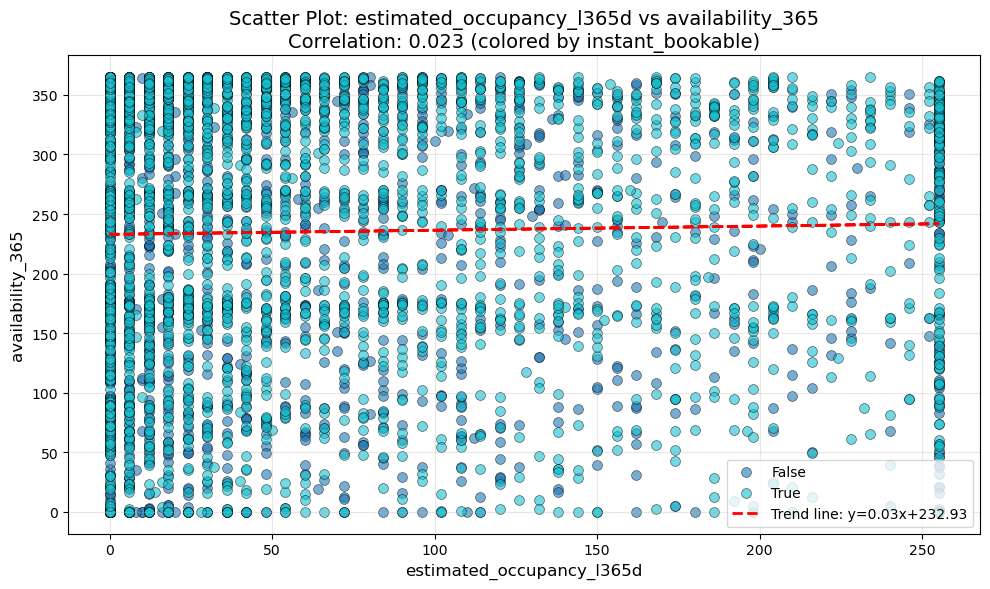

Pearson Correlation: 0.0232
Number of observations: 4437


In [16]:
plot_scatter(df["estimated_occupancy_l365d"], df["availability_365"], hue=df['instant_bookable'])

In [58]:
# Identify the problematic listings
missing_data = df[df['price'].isna() | df['bathrooms'].isna()].copy()

print(f"Missing price: {df['price'].isna().sum()}")
print(f"Missing bathrooms: {df['bathrooms'].isna().sum()}")
print(f"Missing both: {(df['price'].isna() & df['bathrooms'].isna()).sum()}")

# Check patterns
missing_data.groupby('Host_Category').size()
missing_data.groupby('neighbourhood_cleansed').size()
missing_data['has_availability'].value_counts()
missing_data['license'].value_counts(dropna=False).head(10)

# Check if these are active or inactive listings
print(missing_data['number_of_reviews_ltm'].describe())
print(missing_data['estimated_revenue_l365d'].describe())

Missing price: 272
Missing bathrooms: 271
Missing both: 271
count    272.000000
mean       6.746324
std       10.402862
min        0.000000
25%        0.000000
50%        2.000000
75%        8.250000
max       76.000000
Name: number_of_reviews_ltm, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: estimated_revenue_l365d, dtype: float64


/tmp/ipykernel_10033/2973481105.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_data.groupby('neighbourhood_cleansed').size()


In [59]:
missing_data

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category,occupancy_cat,availability_category,revenue_cat,review_diff
0,PROP_BD43,Se - Enti - En #0001,HOST_EA8B,2010-06-03,"Thessalonika, Greece",None,None,0.00,False,2,...,5.00,5.00,LIC_5A6C4F,False,0.02,Small Multi (2-3),nan,nan,nan,0
10,PROP_5117,Ar - Enti - En #0009,HOST_7ABD,2013-07-19,"Thessaloniki, Greece",within an hour,100%,0.93,False,2,...,5.00,4.85,LIC_FCFAB5,False,1.02,Small Multi (2-3),31-60,Year-Round (270+),nan,3
16,PROP_CD63,Mi - Enti - En #0016,HOST_1F6D,2014-07-25,"Thessaloniki, Greece",None,None,1.00,False,1,...,4.92,4.69,LIC_25576F,False,0.52,Individual (1),0-30,Limited (90-180),nan,1
31,PROP_B511,St - Enti - En #0006,HOST_1672,2015-05-15,"Thessaloniki, Greece",within an hour,100%,1.00,True,2,...,4.97,4.82,LIC_918BB2,False,0.98,Small Multi (2-3),200+,Year-Round (270+),nan,2
37,PROP_76A2,Pe - Enti - En #0009,HOST_C781,2014-12-26,"Thessaloniki, Greece",None,None,1.00,True,2,...,4.88,4.83,LIC_2C29FD,True,0.69,Small Multi (2-3),61-100,nan,nan,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,PROP_E5FD,Ηο - Enti - En #1485,HOST_B14C,2015-03-18,"Thessaloniki, Greece",within an hour,100%,1.00,False,33,...,4.71,4.00,LIC_746453,True,2.23,Large Multi (4+),31-60,Year-Round (270+),nan,7
4070,PROP_D6E2,Mi - Enti - En #2610,HOST_1C60,2019-07-15,"Pella, Greece",within an hour,100%,0.90,False,3,...,5.00,4.00,LIC_934306,False,0.58,Small Multi (2-3),0-30,Moderate (180-270),nan,1
4102,PROP_D76C,Am - Enti - En #2634,HOST_CCD9,2019-03-26,"Thessaloniki, Greece",within an hour,100%,1.00,None,267,...,NaN,NaN,LIC_913B0B,True,NaN,Large Multi (4+),nan,nan,nan,0
4136,PROP_3910,St - Enti - En #2669,HOST_4497,2019-01-29,"Thessaloniki, Greece",within an hour,98%,1.00,False,390,...,4.78,3.78,LIC_AC516D,True,3.21,Large Multi (4+),31-60,nan,nan,9


In [67]:
# Identify the problematic subset
missing_key_fields = df[
    df['price'].isna() & 
    df['bathrooms'].isna() & 
    df['beds'].isna() &
    (df["number_of_reviews_ltm"] == 0)
].copy()

print(f"Total missing all 3 fields: {len(missing_key_fields)}")
print(f"Percentage of dataset: {len(missing_key_fields)/len(df)*100:.2f}%")

# Check 1: Are these "zombie" listings?
print("\n=== ACTIVITY STATUS ===")
print(f"has_availability True: {missing_key_fields['has_availability'].sum()} ({missing_key_fields['has_availability'].mean()*100:.1f}%)")
print(f"Availability columns:")
print(missing_key_fields[['availability_30', 'availability_60', 'availability_90', 'availability_365']].describe())

# Check 2: Review activity
print("\n=== REVIEW ACTIVITY ===")
print(missing_key_fields[['number_of_reviews', 'number_of_reviews_ltm', 'last_review']].describe())
print(f"\nListings with 0 reviews: {(missing_key_fields['number_of_reviews'] == 0).sum()}")
print(f"Listings with recent activity (reviews_ltm > 0): {(missing_key_fields['number_of_reviews_ltm'] > 0).sum()}")

# Check 3: Revenue/Occupancy estimates
print("\n=== PERFORMANCE METRICS ===")
print(missing_key_fields[['estimated_revenue_l365d', 'estimated_occupancy_l365d']].describe())
print(f"Listings with revenue > 0: {(missing_key_fields['estimated_revenue_l365d'] > 0).sum()}")

# Check 4: Are they clustered by any characteristic?
print("\n=== DISTRIBUTION PATTERNS ===")
print("By Host Category:")
print(missing_key_fields['Host_Category'].value_counts())

print("\nBy Neighborhood (top 10):")
print(missing_key_fields['neighbourhood_cleansed'].value_counts().head(10))

print("\nBy Room Type:")
print(missing_key_fields['room_type'].value_counts())

print("\nBy License Status:")
print(missing_key_fields['license'].value_counts(dropna=False).head(10))

# Check 5: When were they last active?
print("\n=== TEMPORAL PATTERNS ===")
print("Last review dates:")
print(missing_key_fields['last_review'].describe())

# Check 6: Do they have other descriptive fields?
print("\n=== OTHER FIELDS COMPLETENESS ===")
print(f"Has property_type: {missing_key_fields['property_type'].notna().sum()}")
print(f"Has accommodates: {missing_key_fields['accommodates'].notna().sum()}")
print(f"Has review scores: {missing_key_fields['review_scores_rating'].notna().sum()}")

# Check 7: Compare to complete listings
complete_listings = df[
    df['price'].notna() & 
    df['bathrooms'].notna() & 
    df['beds'].notna()
].copy()

print("\n=== COMPARISON: MISSING vs COMPLETE ===")
print(f"Complete listings: {len(complete_listings)}")
print(f"\nMissing group - avg reviews: {missing_key_fields['number_of_reviews'].mean():.2f}")
print(f"Complete group - avg reviews: {complete_listings['number_of_reviews'].mean():.2f}")

print(f"\nMissing group - avg revenue: {missing_key_fields['estimated_revenue_l365d'].mean():.2f}")
print(f"Complete group - avg revenue: {complete_listings['estimated_revenue_l365d'].mean():.2f}")

# Check 8: Statistical test - are they systematically different?
from scipy.stats import ttest_ind, mannwhitneyu

# Compare review counts
stat, p = mannwhitneyu(
    missing_key_fields['number_of_reviews'].dropna(),
    complete_listings['number_of_reviews'].dropna()
)
print(f"\nMann-Whitney U test (reviews): p={p:.4f}")

# Compare revenue
stat, p = mannwhitneyu(
    missing_key_fields['estimated_revenue_l365d'].dropna(),
    complete_listings['estimated_revenue_l365d'].dropna()
)
print(f"Mann-Whitney U test (revenue): p={p:.4f}")

Total missing all 3 fields: 85
Percentage of dataset: 1.92%

=== ACTIVITY STATUS ===
has_availability True: 75 (100.0%)
Availability columns:
       availability_30  availability_60  availability_90  availability_365
count        85.000000        85.000000        85.000000         85.000000
mean          7.905882        16.917647        26.047059         96.611765
std          11.507372        24.031830        36.271104        137.528014
min           0.000000         0.000000         0.000000          0.000000
25%           0.000000         0.000000         0.000000          0.000000
50%           0.000000         0.000000         0.000000          0.000000
75%          20.000000        47.000000        68.000000        170.000000
max          30.000000        59.000000        89.000000        364.000000

=== REVIEW ACTIVITY ===
       number_of_reviews  number_of_reviews_ltm
count          85.000000                   85.0
mean           10.752941                    0.0
std           

/tmp/ipykernel_10033/2459060613.py:80: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(
